In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
x = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
'HasCrCard','IsActiveMember', 'EstimatedSalary']]
y=df['Exited']

In [10]:
y.value_counts()



Exited
0    7963
1    2037
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25, random_state=0)
from sklearn.neural_network import MLPClassifier
nnmodel = MLPClassifier(hidden_layer_sizes=(80,80,80), random_state=0,max_iter=100,activation='relu')


In [15]:
nnmodel.fit(x_train,y_train)

c:\Users\SURESH CHOUDHARY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(80, 80, 80), max_iter=100, random_state=0)

In [16]:
MLPClassifier(hidden_layer_sizes=(80,80,80), max_iter=100,random_state=0)
ypred = nnmodel.predict(x_test)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
y_test.value_counts()


Exited
0    1991
1     509
Name: count, dtype: int64

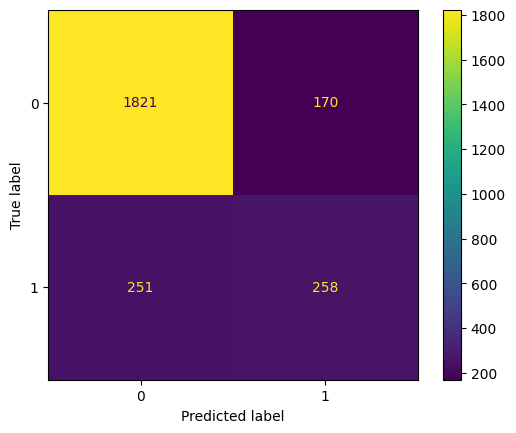

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test,ypred)

In [20]:
accuracy_score(y_test,ypred)

0.8316

In [21]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1991
           1       0.60      0.51      0.55       509

    accuracy                           0.83      2500
   macro avg       0.74      0.71      0.72      2500
weighted avg       0.82      0.83      0.83      2500



In [22]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [23]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_new,Y_new=ros.fit_resample(x,y)
Y_new.value_counts()


Exited
1    7963
0    7963
Name: count, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_new)


In [29]:
Xn_train,Xn_test,Yn_train,Yn_test=train_test_split(x_scaled,Y_new,random_state=0,test_size=0.25)

In [31]:
from sklearn.neural_network import MLPClassifier
nn_model=MLPClassifier(hidden_layer_sizes=(80,80,80),random_state=0,max_iter=100,activation='relu')
nn_model.fit(Xn_train,Yn_train)

c:\Users\SURESH CHOUDHARY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(80, 80, 80), max_iter=100, random_state=0)

In [32]:
MLPClassifier(hidden_layer_sizes=(80, 80, 80), max_iter=100,
random_state=0)
y_pred=nn_model.predict(Xn_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [33]:
Yn_test.value_counts()

Exited
1    2001
0    1981
Name: count, dtype: int64

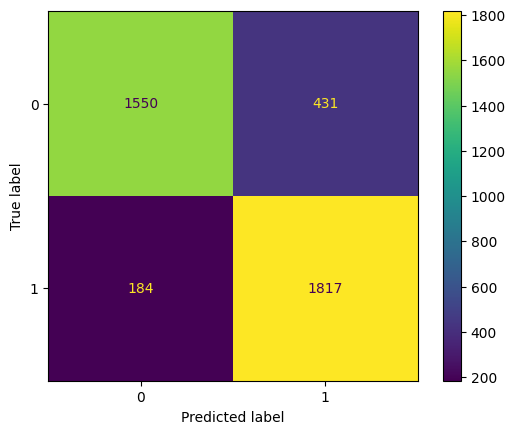

In [34]:
ConfusionMatrixDisplay.from_predictions(Yn_test,y_pred)


In [35]:
accuracy_score(Yn_test,y_pred)

0.8455549974886991

In [36]:
print(classification_report(Yn_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1981
           1       0.81      0.91      0.86      2001

    accuracy                           0.85      3982
   macro avg       0.85      0.85      0.84      3982
weighted avg       0.85      0.85      0.84      3982

